##Importing Libraries

In [7]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


##Importing the Handwritten Digit MNIST Dataset

In [8]:
numbers_mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = numbers_mnist.load_data()

##Exploring the Data

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

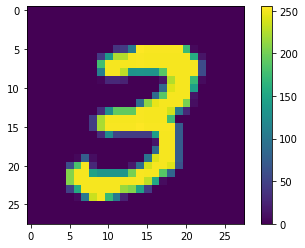

In [11]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

##Scaling the Data from 0 to 1

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [13]:
train_images[7][14]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.17647059, 0.87058824,
       0.98823529, 0.98823529, 0.98823529, 0.98823529, 0.99215686,
       0.98823529, 0.98823529, 0.98823529, 0.69411765, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

##Viewing Dataset Images

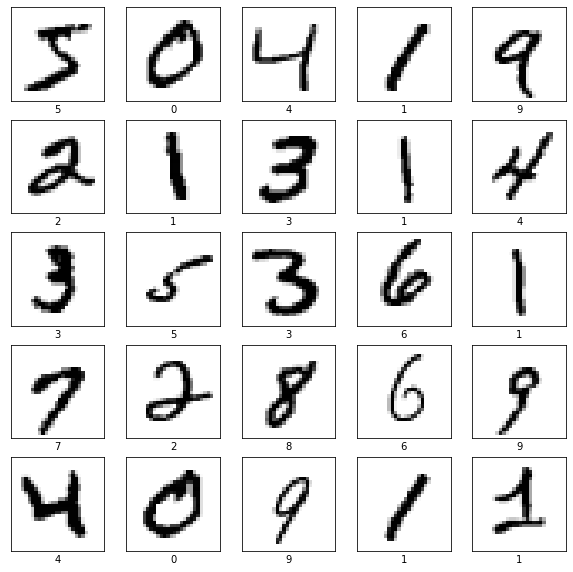

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

##Building the Model

###Setting up the Layers

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

###Compiling the Model

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###Training the Model

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2513 - accuracy: 0.9294
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1121 - accuracy: 0.9673
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0460 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0359 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0288 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0178 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

###Evaluating Accuracy

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0910 - accuracy: 0.9765

Test accuracy: 0.9764999747276306


##Making Predictions on Test Set

###Creating Prediction Probability Model

In [19]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

###Making Predictions on Test Images

In [20]:
predictions = probability_model.predict(test_images)

###Viewing Test Image 1

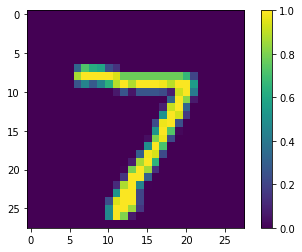

In [21]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

###Viewing Prediction Probabilities for Test Image 1

In [22]:
predictions[0]

array([8.36223885e-12, 1.06293974e-10, 4.51797852e-08, 4.98841473e-06,
       3.44853573e-12, 1.51304608e-10, 1.38083642e-12, 9.99994993e-01,
       8.14166246e-09, 4.39491288e-09], dtype=float32)

###Getting Most Confident Probability for Test Image 1

In [23]:
np.argmax(predictions[0])

7

###Verifying Prediction for Test Image 1

In [24]:
test_labels[0]

7

##Making Predictions on my own Written Digits

###Making Prediction on Image 1

####Getting Black/White Pixel Values for Image 1

In [25]:
# Digit Written: 6
"""
1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0
1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
"""

'\n1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0\n1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0\n1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0\n1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0\n1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0\n1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0\n0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0\n1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0\n1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0\n1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0\n1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0\n0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0\n1 1 1 0 0 0 0 1 1 1 1 0 0 0 

####Getting Greyscale Pixel Values for Image 1

In [40]:
image_1_greyscale = """
125 125 128 130 129 132 133 131 134 133 132 133 132 134 136 136 135 135 137 138 136 136 140 137 136 136 135 136
126 124 128 131 129 132 133 133 134 135 135 133 133 135 137 136 135 134 126 114 125 135 138 136 136 134 133 135
126 125 127 130 127 131 133 132 134 135 135 133 132 131 132 136 133 122 87 64 102 138 136 136 136 136 135 136
125 126 127 129 129 131 133 129 131 135 135 133 133 130 128 121 100 75 66 71 109 138 136 134 136 137 135 136
125 128 130 129 129 131 133 129 129 133 131 132 134 129 106 75 56 64 96 113 128 137 134 133 135 137 135 136
125 128 132 129 127 129 134 130 129 132 128 128 125 101 67 60 74 106 129 134 136 138 135 134 136 138 135 136
124 126 131 129 127 129 133 129 129 131 127 124 86 59 66 93 117 128 132 133 135 139 133 131 134 136 135 137
127 127 131 130 128 129 130 129 128 126 123 93 57 70 106 125 128 131 133 135 134 136 133 128 131 136 136 136
126 127 130 130 132 131 129 128 132 126 95 54 71 111 127 132 129 131 135 135 134 133 132 130 132 136 136 135
126 127 129 131 130 131 129 126 131 104 57 63 105 128 132 130 129 130 134 135 133 134 131 130 134 136 137 136
128 129 129 129 129 129 129 128 116 68 59 103 128 130 134 135 131 128 133 137 132 135 133 128 135 139 137 136
128 127 131 126 126 128 129 123 83 54 97 128 121 111 107 106 114 127 136 135 133 135 136 133 136 139 138 136
125 126 128 126 125 129 131 114 60 69 115 106 74 55 56 61 69 87 116 135 133 136 136 135 138 139 138 136
124 129 127 127 127 131 131 103 54 78 74 55 43 44 62 70 60 53 71 117 131 133 138 136 136 139 136 135
125 127 130 130 127 131 131 91 55 79 45 49 72 91 110 113 100 81 65 86 127 133 135 139 139 136 137 137
127 130 132 129 127 131 131 97 59 95 81 96 118 124 129 132 132 126 91 66 119 134 131 135 138 135 136 136
127 131 131 130 128 131 131 106 60 99 124 123 129 129 128 128 131 136 99 65 116 134 129 133 135 135 135 135
125 126 126 128 128 129 129 118 67 74 127 131 129 130 126 130 132 120 73 69 123 134 132 134 135 133 136 138
125 126 125 125 127 129 128 126 88 50 86 119 127 129 128 125 109 76 48 86 130 135 133 134 138 135 136 140
125 124 126 125 125 130 129 128 110 63 44 64 82 90 88 77 59 41 53 110 134 134 136 135 136 139 137 139
126 123 125 126 125 126 126 128 123 100 61 36 36 36 35 35 39 56 92 126 133 133 136 136 136 136 137 138
125 125 125 125 124 126 126 126 128 123 107 83 71 57 55 68 83 104 126 134 131 135 135 138 138 136 134 134
123 123 125 125 124 125 126 128 129 126 124 121 117 110 109 115 119 125 129 132 132 135 135 138 138 136 134 135
121 123 124 123 123 123 124 128 129 125 124 127 126 126 124 127 124 125 128 132 132 131 131 136 136 135 136 134
124 124 122 121 122 124 124 125 126 124 121 124 126 125 127 127 128 128 128 130 132 131 131 134 135 136 136 137
123 126 124 124 123 121 123 124 123 124 123 124 124 126 130 128 127 129 131 129 131 134 134 134 134 133 133 135
122 124 125 126 124 122 123 123 124 124 123 124 125 125 128 128 127 128 132 131 130 134 134 135 132 132 132 131
123 123 127 126 125 123 123 124 125 124 122 125 125 124 125 128 131 130 131 133 131 134 133 132 131 132 132 130
"""

####Scaling Image 1 Greyscale Data

In [41]:
# Printing length
print(len(image_1_greyscale.split()))

# Converting values to int
test_image_1 = [int(i) for i in image_1_greyscale.split()]

# Viewing pixel values
print(test_image_1[:10])
print(max(test_image_1))

# Scaling data by dividing by max
test_image_1 = [i / 140.0 for i in test_image_1]

# Viewing scaled pixel values
print(test_image_1[:2])
print(test_image_1[-2:])

784
[125, 125, 128, 130, 129, 132, 133, 131, 134, 133]
140
[0.8928571428571429, 0.8928571428571429]
[0.9428571428571428, 0.9285714285714286]


####Formatting Image 1 Greyscale Data

In [42]:
# Creating new array
test_image_resized_1 = []
count = 0

# Running loop to create rows of pixels
for i in range(28):
  temp = test_image_1[28*count: 28*count + 28]
  test_image_resized_1.append(temp)
  count += 1

# Reversing pixel values to match training data
for i in range(28):
  for j in range(28):
    test_image_resized_1[i][j] = 1 - test_image_resized_1[i][j]

# Converting array to Numpy array
test_image_resized_1 = np.array(test_image_resized_1)

# Viewing new array of pixel values
print(test_image_resized_1.shape)
print(test_image_resized_1[0][:2])
print(test_image_resized_1[27][-2:])

(28, 28)
[0.10714286 0.10714286]
[0.05714286 0.07142857]


####Converting Pixel Array to Numpy Batch

In [43]:
test_image_resized_1 = (np.expand_dims(test_image_resized_1,0))
print(test_image_resized_1.shape)

(1, 28, 28)


####Viewing Image

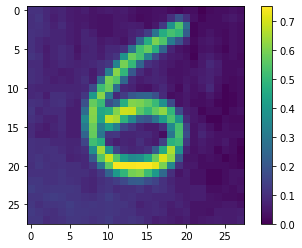

In [44]:
plt.figure()
plt.imshow(test_image_resized_1[0])
plt.colorbar()
plt.grid(False)
plt.show()

####Outputting Model Prediction on Image 1

In [47]:
print("Predicted Number:", np.argmax(probability_model.predict(test_image_resized_1)))

Predicted Number: 6


###Making Prediction on Image 2

####Getting Black/White Pixel Values for Image 2

In [33]:
# Digit Written: 2
"""
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
"""

'\n0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0\n0 0 0 0 0 0 0 0 0 0 1 0 0 0 

####Getting Greyscale Greyscale Pixel Values for Image 2

In [34]:
image_2_greyscale = """
145 144 143 145 149 149 145 147 150 151 150 154 156 154 151 149 155 156 157 154 156 160 155 156 153 157 155 153
146 147 144 143 149 151 148 146 149 151 149 152 156 155 149 150 154 156 155 154 159 160 156 156 155 157 156 152
147 148 147 145 146 149 148 148 150 149 148 149 152 156 148 148 153 156 154 154 156 160 155 156 156 159 154 153
147 148 145 146 147 146 150 149 151 150 148 148 146 155 153 148 154 154 153 151 154 157 153 155 157 160 154 151
147 149 145 146 149 146 152 151 151 152 151 146 140 138 146 150 153 155 153 152 156 156 154 154 156 159 156 154
144 149 146 149 151 151 153 153 152 145 133 127 116 110 113 129 149 154 153 155 155 156 160 156 156 159 155 154
144 145 150 148 148 152 154 154 139 120 105 107 107 106 102 105 125 147 149 153 154 160 160 156 156 157 155 153
145 144 151 153 148 150 155 137 108 104 111 128 132 136 126 108 102 124 145 154 156 157 164 156 155 156 155 154
146 147 147 153 152 151 155 115 98 117 143 156 150 150 147 130 110 107 139 156 156 159 161 159 156 155 154 154
149 149 148 152 154 155 152 124 132 155 155 154 150 154 153 145 122 100 129 156 155 157 162 156 157 156 155 151
153 153 151 154 156 155 157 156 160 161 156 156 154 153 153 150 126 96 124 154 154 156 161 156 154 156 154 150
154 154 154 155 157 157 159 160 161 162 159 160 157 156 154 156 132 95 127 151 155 156 156 155 153 155 154 150
154 155 156 158 157 158 160 162 163 166 162 164 161 152 143 146 125 101 131 152 152 156 156 153 151 153 152 149
156 156 156 157 158 157 159 163 165 168 165 151 134 128 119 113 105 99 119 149 153 152 155 151 148 152 150 149
157 157 162 157 156 156 159 162 168 168 143 125 120 117 118 111 104 102 99 123 151 150 154 154 148 152 148 149
161 157 160 162 157 156 157 161 172 160 119 117 129 141 143 119 110 124 109 100 126 153 151 153 150 151 150 146
162 160 156 159 160 161 156 164 176 150 115 143 168 170 146 113 118 156 138 109 99 138 150 149 150 146 152 145
164 164 157 157 157 160 159 166 173 144 122 152 175 156 123 110 143 167 161 132 101 113 145 150 151 146 148 146
165 164 162 160 160 157 159 164 175 159 133 126 140 132 119 143 165 165 171 163 114 95 139 152 154 148 149 149
165 163 163 162 161 161 159 166 171 176 153 135 127 121 144 166 167 166 169 180 130 89 131 155 155 151 149 153
167 165 163 161 161 160 160 167 169 176 178 168 146 159 170 167 171 169 170 181 134 95 136 161 154 154 150 152
168 165 164 163 160 161 161 168 169 172 181 185 180 175 173 170 170 173 175 180 156 141 157 160 156 157 154 152
167 167 165 164 160 161 161 166 168 171 176 176 178 176 172 171 170 173 173 176 176 167 161 157 160 161 155 155
165 168 167 165 163 163 162 165 166 169 173 178 178 173 170 169 170 170 169 172 170 167 165 161 161 161 156 156
167 168 166 165 163 164 164 163 169 172 173 175 175 176 173 171 169 169 169 173 171 166 163 164 162 161 162 162
166 167 166 165 164 164 166 160 167 171 173 175 173 175 176 175 169 169 166 171 173 166 164 171 166 161 164 168
166 166 167 166 168 164 165 163 164 168 170 175 173 173 172 176 170 168 168 170 173 165 163 169 170 165 165 171
168 165 167 166 167 166 164 162 164 169 171 175 173 173 171 175 172 168 167 168 173 167 160 165 172 169 170 172
"""

####Scaling Image 2 Greyscale Data

In [49]:
# Printing length
print(len(image_2_greyscale.split()))

# Converting values to int
test_image_2 = [int(i) for i in image_2_greyscale.split()]

# Viewing pixel values
print(test_image_2[:10])
print(max(test_image_2))

# Scaling data by dividing by max
test_image_2 = [i / 185.0 for i in test_image_2]

# Viewing scaled pixel values
print(test_image_2[:2])
print(test_image_2[-2:])

784
[145, 144, 143, 145, 149, 149, 145, 147, 150, 151]
185
[0.7837837837837838, 0.7783783783783784]
[0.918918918918919, 0.9297297297297298]


####Formatting Image 2 Greyscale Data

In [50]:
# Creating new array
test_image_resized_2 = []
count = 0

# Running loop to create rows of pixels
for i in range(28):
  temp = test_image_2[28*count: 28*count + 28]
  test_image_resized_2.append(temp)
  count += 1

# Reversing pixel values to match training data
for i in range(28):
  for j in range(28):
    test_image_resized_2[i][j] = 1 - test_image_resized_2[i][j]

    # Replacing smaller values with 0
    if test_image_resized_2[i][j] < 0.2:
      test_image_resized_2[i][j] = 0

# Converting array to Numpy array
test_image_resized_2 = np.array(test_image_resized_2)

# Viewing new array of pixel values
print(test_image_resized_2.shape)
print(test_image_resized_2[0][:2])
print(test_image_resized_2[27][-2:])

(28, 28)
[0.21621622 0.22162162]
[0. 0.]


####Converting Pixel Array to Numpy Batch

In [51]:
test_image_resized_2 = (np.expand_dims(test_image_resized_2,0))
print(test_image_resized_2.shape)

(1, 28, 28)


####Viewing Image

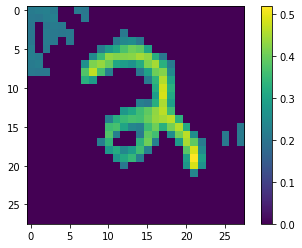

In [52]:
plt.figure()
plt.imshow(test_image_resized_2[0])
plt.colorbar()
plt.grid(False)
plt.show()

####Outputting Model Prediction on Image 2

In [53]:
print("Predicted Number:", np.argmax(probability_model.predict(test_image_resized_2)))

Predicted Number: 2
